
# Project: 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#model">Regression Models</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

>The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanatory:

>Source:

- Acknowledgements
This data was initially featured in the following paper:
Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

- 'Hands-On Machine learning with Scikit-Learn and TensorFlow' by Aurélien Géron.
Aurélien Géron wrote:
This dataset is a modified version of the California Housing dataset available from:
Luís Torgo's page (University of Porto)

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
sb.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

In [4]:
import warnings
warnings.simplefilter("ignore")

In [5]:
#Read Data 
df = pd.read_csv('D:/Downloads/housing.csv.zip', compression='zip')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


| Column name   | Desc         |
|:------------- |:-------------| 
| longitude | Numerical,A measure of how far west a house is; a higher value is farther west  | 
|latitude |Numerical, A measure of how far north a house is; a higher value is farther north |
|housingmedianage |Numerical, Median age of a house within a block; a lower number is a newer building |
| total_rooms|Numerical,Total number of rooms within a block |
|total_bedrooms |Numerical,Total number of bedrooms within a block |
|population |Numerical, Total number of people residing within a block|
|households |Numerical,Total number of households, a group of people residing within a home unit, for a block |
|median_income |Numerical, Median income for households within a block of houses (measured in tens of thousands of US Dollars)|
|medianhousevalue |Numerical, Median house value for households within a block (measured in US Dollars)|
|ocean_proximity|string, Location of the house w.r.t ocean/sea |



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
#checking for null values
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
#checking for duplicated values
df.duplicated().sum()

0

In [9]:
#Summary Stats
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<a id='eda'></a>
# Exploratory Data Analysis

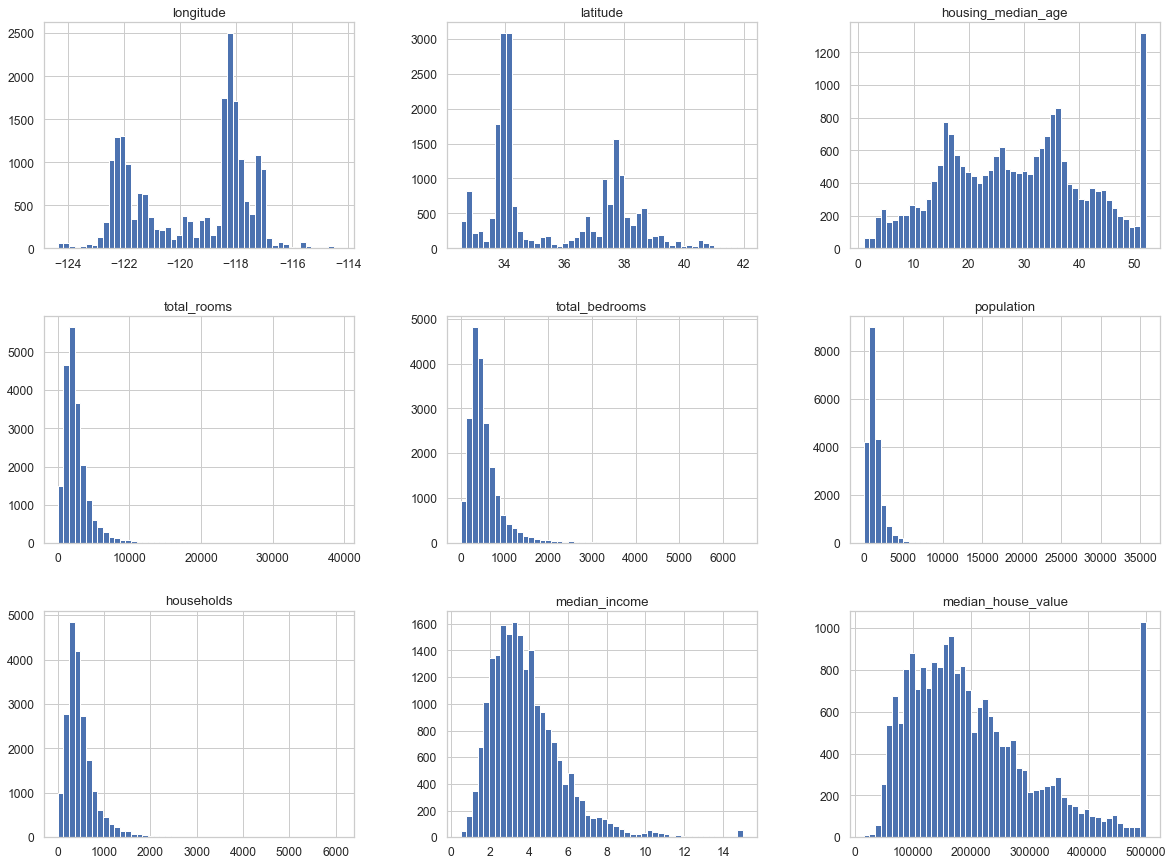

In [6]:
#plotting the distribution of numerical data
df.hist(bins = 50, layout=(3, 3), figsize=(20, 15));

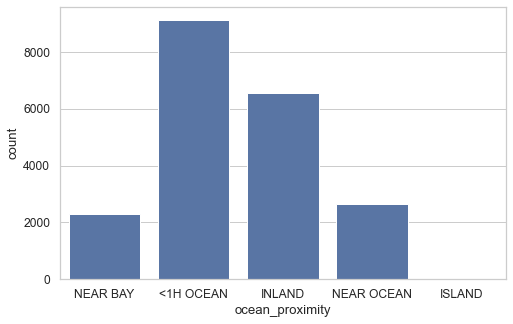

In [7]:
#plotting the ocean_proximity categorical variable 
sb.countplot(df['ocean_proximity'], color=sb.color_palette()[0]);

### Data Cleaning

- Dividing the income column into bins
- feature engineering and data imputation

In [8]:
#dividing median income column into bins
df['income_cat'] = pd.cut(df['median_income'], bins=[0, 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

In [9]:
df['income_cat'].value_counts(normalize=True)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

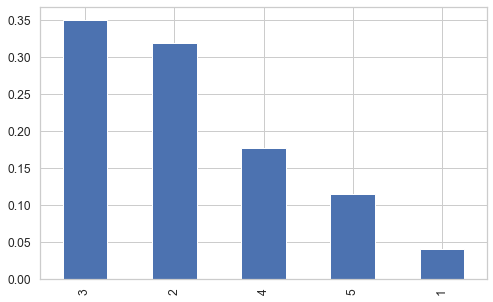

In [23]:
df['income_cat'].value_counts(normalize=True).plot(kind = 'bar');

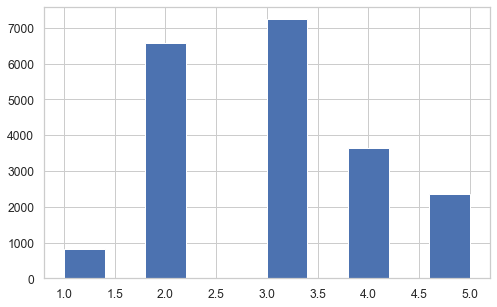

In [25]:
df['income_cat'].hist();

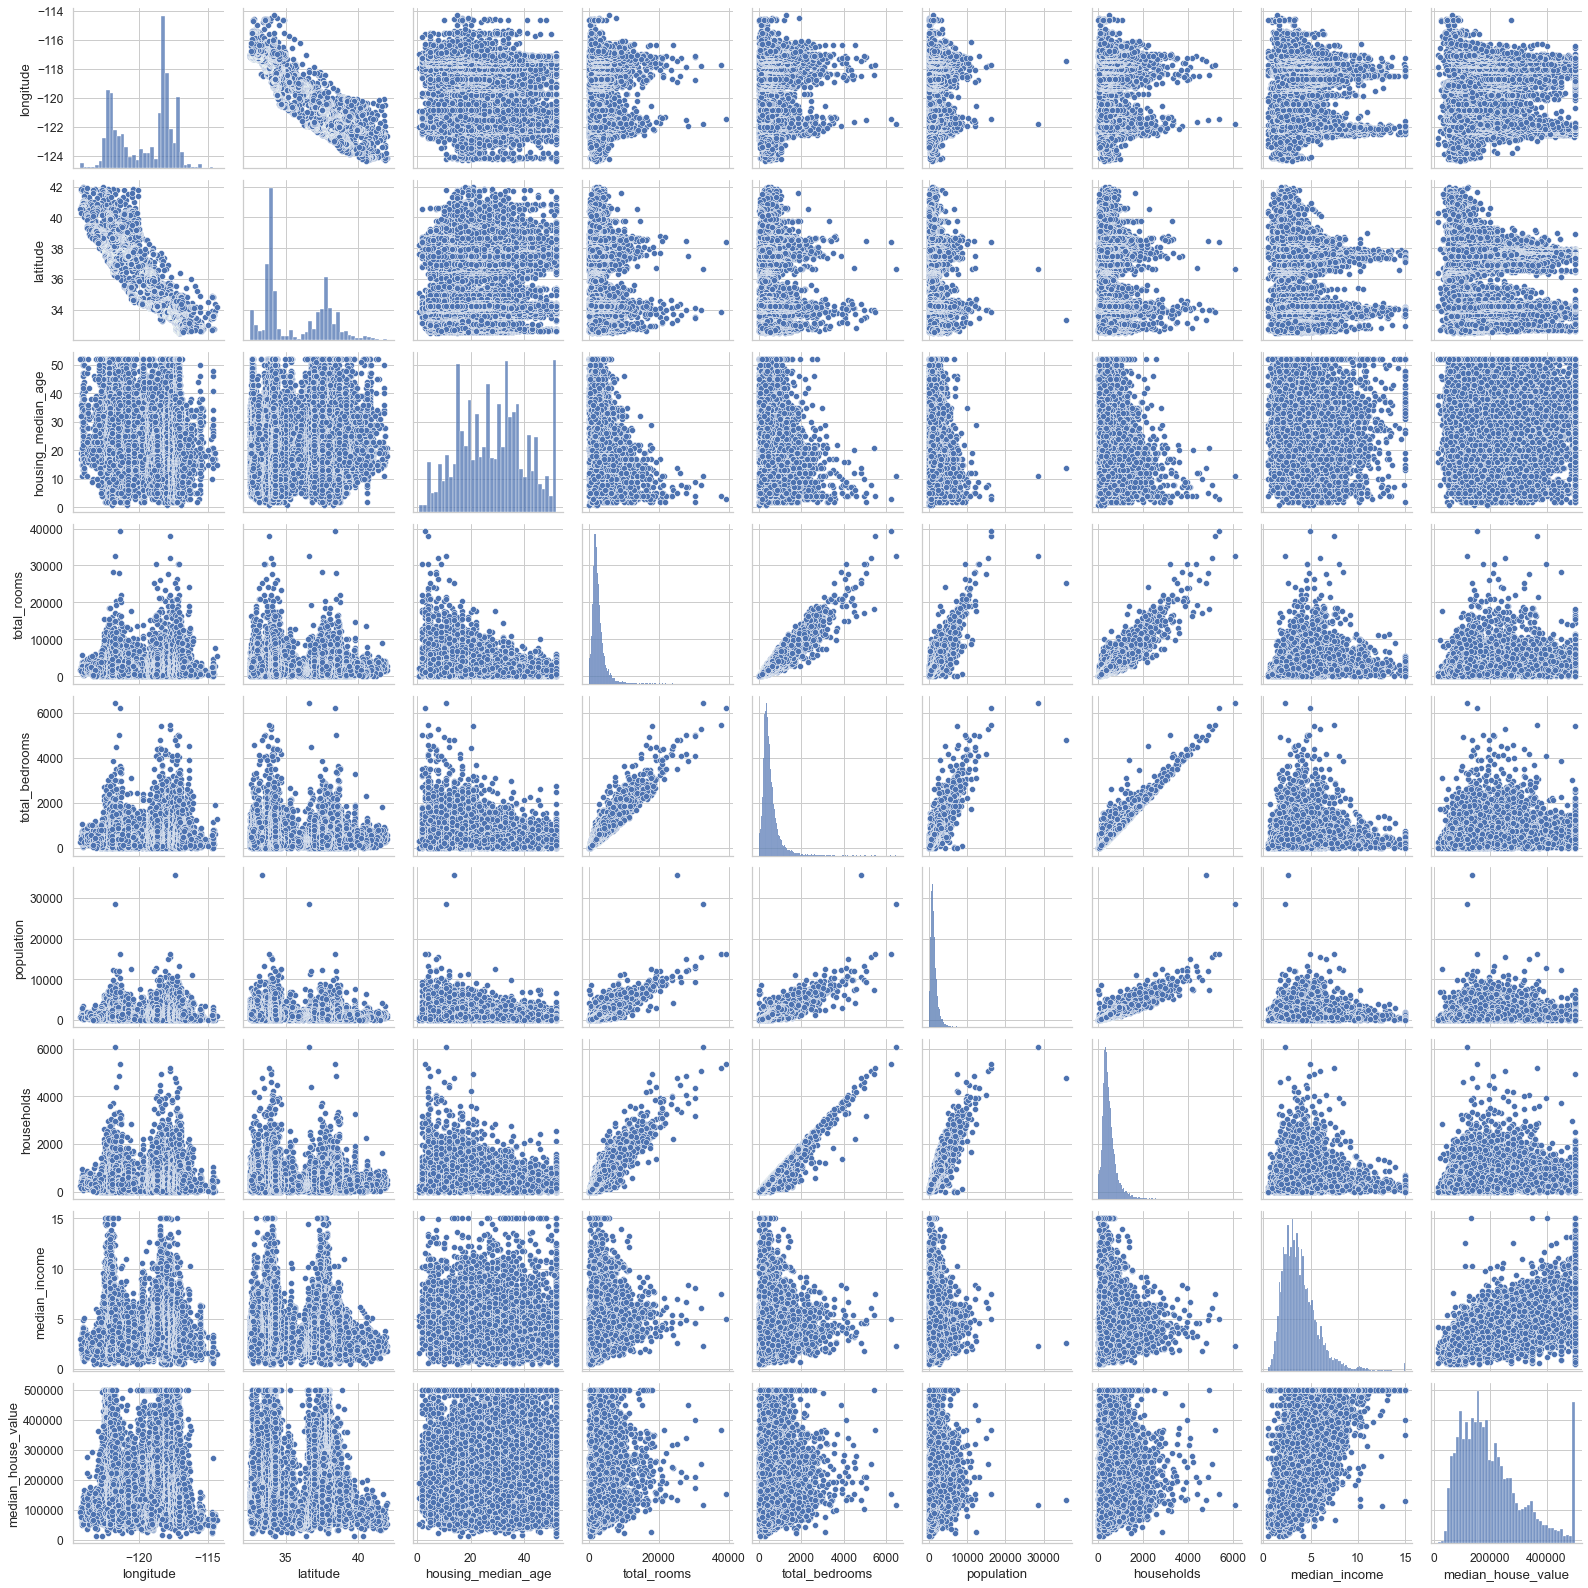

In [34]:
sb.pairplot(df);

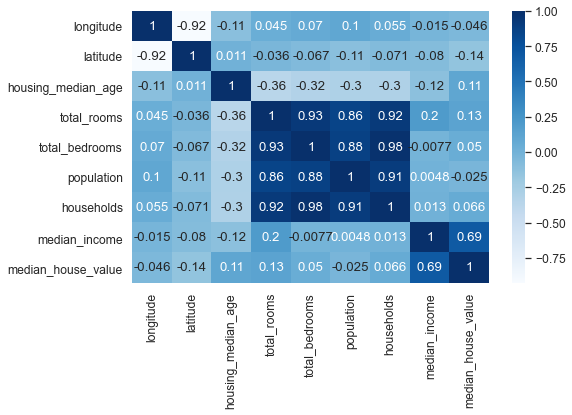

<Figure size 1080x1080 with 0 Axes>

In [31]:
sb.heatmap(df.corr(), annot=True, cmap='Blues');

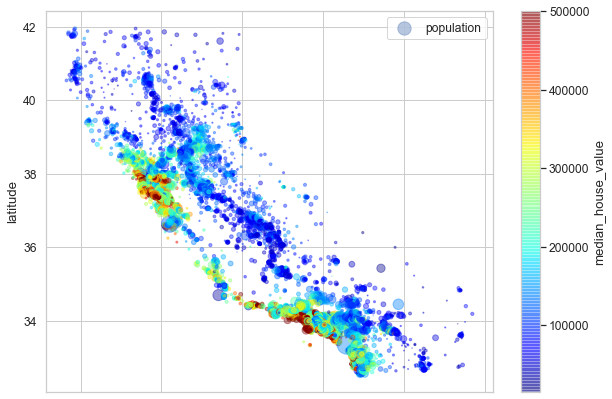

In [35]:
#plotting Longitude and latitude scatter
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=df["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend();

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


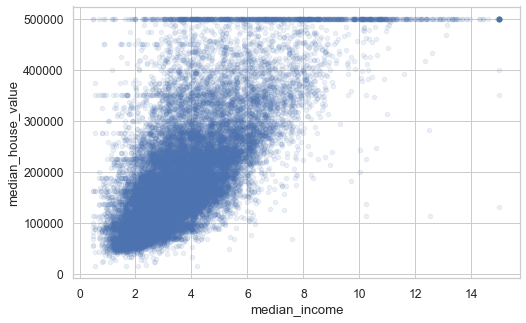

In [38]:
df.plot(kind ='scatter', x= 'median_income', y='median_house_value', alpha =0.1);

### Feature Engineering & Data Preprocessing

In [10]:
df['rooms_per_household']      = df['total_rooms']/df['households']
df['bedrooms_per_room']        = df['total_bedrooms']/df['total_rooms']
df['population_per_household'] = df['population']/df['households']

In [42]:
corr_marix = df.corr()
corr_marix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

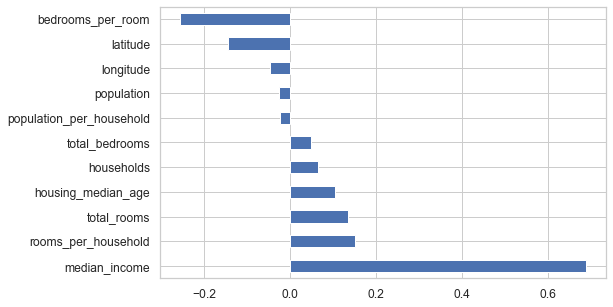

In [46]:
#plotting the correlated variables with response variable
corr_marix['median_house_value'].sort_values(ascending = False)[1:].plot(kind = 'barh');

In [11]:
#using StratifiedShuffleSplit to split data equally 
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(df, df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set  = df.loc[test_index]

In [12]:
#Test
strat_test_set['income_cat'].value_counts(normalize=True)

3    0.350614
2    0.318798
4    0.176357
5    0.114341
1    0.039890
Name: income_cat, dtype: float64

In [13]:
#Dropping the Income Cat column to return the data to it's original form
for set_ in (strat_test_set, strat_train_set):
    set_.drop('income_cat', axis =1, inplace = True)

In [14]:
#assigning the train and test dataset
housing       = strat_train_set.drop('median_house_value', axis=1)
housing_label = strat_train_set['median_house_value'].copy()

In [15]:
#encoding categorical variables with pandas get dummies
housing = pd.get_dummies(housing)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
8577,-118.41,33.89,31.0,1428.0,320.0,677.0,331.0,7.2316,4.314199,0.224090,2.045317,1,0,0,0,0
5960,-117.83,34.11,29.0,2671.0,437.0,1484.0,445.0,4.9844,6.002247,0.163609,3.334831,0,1,0,0,0
4753,-118.33,34.04,31.0,1090.0,251.0,955.0,239.0,2.9130,4.560669,0.230275,3.995816,1,0,0,0,0
15423,-117.26,33.20,13.0,3163.0,725.0,1675.0,629.0,2.8214,5.028617,0.229213,2.662957,1,0,0,0,0
9788,-120.51,35.91,39.0,768.0,162.0,264.0,118.0,5.3245,6.508475,0.210938,2.237288,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13602,-117.25,34.15,30.0,1770.0,380.0,990.0,348.0,3.3000,5.086207,0.214689,2.844828,0,1,0,0,0
14693,-117.11,32.79,16.0,1791.0,518.0,1006.0,491.0,3.5179,3.647658,0.289224,2.048880,0,0,0,0,1
15591,-116.34,33.36,24.0,2746.0,514.0,731.0,295.0,3.3214,9.308475,0.187181,2.477966,0,1,0,0,0
5676,-118.29,33.71,36.0,3135.0,746.0,1815.0,697.0,3.7596,4.497848,0.237959,2.604017,0,0,0,0,1


In [16]:
#using the simple imputer method to impute missing data 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [17]:
X = imputer.fit_transform(housing)

In [18]:
housing_transformed = pd.DataFrame(X, columns=housing.columns)

In [64]:
#test
housing_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   14448 non-null  float64
 1   latitude                    14448 non-null  float64
 2   housing_median_age          14448 non-null  float64
 3   total_rooms                 14448 non-null  float64
 4   total_bedrooms              14448 non-null  float64
 5   population                  14448 non-null  float64
 6   households                  14448 non-null  float64
 7   median_income               14448 non-null  float64
 8   rooms_per_household         14448 non-null  float64
 9   bedrooms_per_room           14448 non-null  float64
 10  population_per_household    14448 non-null  float64
 11  ocean_proximity_<1H OCEAN   14448 non-null  float64
 12  ocean_proximity_INLAND      14448 non-null  float64
 13  ocean_proximity_ISLAND      144

In [19]:
#scalling the data before modelling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_transformed)

<a id='model'></a>
# Regression Models 

##### Linear regression

In [20]:
#starting with linear regression model as a baseline
from sklearn.linear_model import LinearRegression
lin_reg   = LinearRegression()
lin_model = lin_reg.fit(housing_scaled, housing_label)

In [21]:
preds=lin_reg.predict(housing_scaled)

In [22]:
from sklearn.metrics import mean_squared_error
eval_ = mean_squared_error(housing_label, preds)
lin_rmse = np.sqrt(eval_)
lin_rmse

68146.1413322063

##### Decision Trees

In [23]:
from sklearn.tree import DecisionTreeRegressor
tree_reg   = DecisionTreeRegressor()
tree_reg.fit(housing_scaled, housing_label)

DecisionTreeRegressor()

In [24]:
tree_preds = tree_reg.predict(housing_scaled)
tree_eval_ = mean_squared_error(housing_label, tree_preds)
tree_rmse  = np.sqrt(tree_eval_)
tree_rmse

0.0

In [25]:
from sklearn.model_selection import cross_val_score
scores =  cross_val_score(tree_reg, housing_scaled, housing_label, cv=10, scoring='neg_mean_squared_error')
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([66863.11731907, 70608.77780135, 69724.81909694, 70350.51078957,
       72951.04239951, 70432.71667261, 69475.14428886, 69471.98908415,
       70041.06772987, 73437.43172459])

In [ ]:
lin_scores = cross_val_score(lin_model, housing_scaled, housing_label, cv=10, scoring='neg_mean_squared_error')
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores

##### Random Forest 

In [27]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_scaled, housing_label)

RandomForestRegressor()

In [28]:
forest_preds = forest_reg.predict(housing_scaled)

In [29]:
forest_eval  = mean_squared_error(housing_label, forest_preds) 
forest_rmse  = np.sqrt(forest_eval)
forest_rmse

18767.32526670125

In [ ]:
forest_scores = cross_val_score(forest_reg, housing_scaled, housing_label, cv=10, scoring='neg_mean_squared_error')
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores

##### Grid search CV 

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [79]:
param_grid = [{
    'n_estimators' : [40, 80 , 100 , 150], 'max_features': [2, 4, 6, 8, 10]}, 
    {'bootstrap':[False], 'n_estimators':[3, 10], 'max_features':[2, 3, 4]}
]
forest_reg2 = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg2, param_grid, cv=5, 
                          scoring='neg_mean_squared_error', return_train_score=True)

In [80]:
grid_search.fit(housing_scaled, housing_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [40, 80, 100, 150]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [81]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 150}

In [82]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [83]:
feature_importance_df =pd.DataFrame(list(zip(feature_importances, housing.columns)))
feature_importance_df.columns = ['Feature_importance', 'feature']
feature_importance_df = feature_importance_df.sort_values(by ='Feature_importance', ascending = False).reset_index()

In [84]:
feature_importance_df.drop('index', inplace=True, axis = 1)

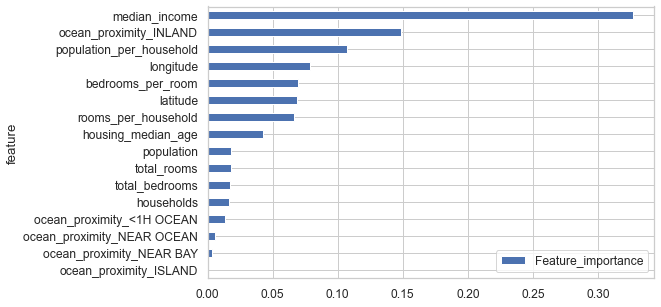

In [85]:
#plotting the feature importance according to the grid search best estimator 
feature_importance_df.set_index('feature').plot(kind ='barh')
plt.gca().invert_yaxis()
plt.legend(loc = 'lower right');

In [65]:
#using sklearn Pipeline to assign imputer and standard scaler to the test dataset 
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler()),
])

In [86]:
#final Model
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)

y_test = strat_test_set["median_house_value"].copy()



In [116]:
X_test = pd.get_dummies(X_test)
X_test.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17966,-121.98,37.31,32.0,2248.0,460.0,1191.0,419.0,5.606,5.365155,0.204626,2.842482,1,0,0,0,0


In [117]:
X_test_prepared = num_pipeline.fit_transform(X_test)

In [89]:
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [90]:
final_rmse

48580.6428212319

##### Support Vector Model

In [92]:
from sklearn.svm import LinearSVR

Cs = [0.1, 1, 10]
for C in Cs:
    SVR = LinearSVR(C=C)
    

In [93]:
SVR.get_params()

{'C': 10,
 'dual': True,
 'epsilon': 0.0,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'loss': 'epsilon_insensitive',
 'max_iter': 1000,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [96]:
SVR.fit(housing_scaled, housing_label)

LinearSVR(C=10)

In [99]:
housing_predictions = SVR.predict(housing_scaled)
svm_mse = mean_squared_error(housing_label, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

130289.60202883593

In [100]:
from sklearn.svm import SVR

In [101]:
param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_scaled, housing_label)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ C=10.0, kernel=linear, total=   3.8s
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV] ............................ C=10.0, kernel=linear, total=   4.0s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   4.2s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   3.8s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   3.6s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   3.6s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   3.7s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   3.6s
[CV] C=30.0, kernel=linear ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 26.7min finished


GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [102]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

71702.37985117122

In [104]:
grid_search.best_params_

{'C': 100.0, 'kernel': 'linear'}

In [107]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(housing_scaled, housing_label)



In [110]:
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

##### Ridge CV & Lasso CV

In [111]:

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test_prepared))

print(ridgeCV.alpha_, ridgeCV_rmse)

80.0 67513.72841983374


In [113]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(housing_scaled, housing_label)



In [118]:
lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test_prepared))

print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower

1e-05 67440.5415096741


In [120]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(housing_scaled, housing_label)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test_prepared))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

0.0005 0.1 67441.43070861377


<a id='conclusions'></a>
## Conclusions



> Credits and inspirations:
'Hands-On Machine learning with Scikit-Learn and TensorFlow' BOOK by **Aurélien Géron**. Aurélien Géron wrote: This dataset is a modified version of the California Housing dataset available from: Luís Torgo's page (University of Porto)

> After trying different regression models, Random forrest seem to outperform other models with the lowest RMSE